# Anàlisi d'un dataset

Autors: Manuel Arnau Fernández, Marina Palomar González, Alba Fernández Coronado

## Introducció

El tractament de dades avui en dia és una eina fonamental per prendre decisions precises de manera automàtica. Tot i així, com les decissions les pren una màquina seguint uns patrons marcats per un aprenentatge previ, es poden produir alguns errors.

Aquest projecte tracta d'analitzar i explorar un conjunt de dades de costos mèdics en assegurances de salud d'Estats Units per trobar respostes a preguntes a través de probes d'hipòtesis estadístiques.

In [37]:
# Carregant les llibreries necessàries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [45]:
# Carregant el conjunt de dades
dataset = pd.read_csv(r'.\insurance.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.head()

Mida de les dades: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
# Entenent els tipus de variables de cada atribut
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
# Convertint cadenes a dades numèriques per poder més endavant poder treballar amb elles.
dataset['sex'].replace(to_replace='female',value='1',inplace=True)
dataset['sex'].replace(to_replace='male',value='0',inplace=True)
dataset['smoker'].replace(to_replace='yes',value='1',inplace=True)
dataset['smoker'].replace(to_replace='no',value='0',inplace=True)
dataset['region'].replace(to_replace='southwest',value='1',inplace=True)
dataset['region'].replace(to_replace='southeast',value='2',inplace=True)
dataset['region'].replace(to_replace='northwest',value='3',inplace=True)
dataset['region'].replace(to_replace='northeast',value='4',inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
#ARGUMENTAR ATRIBUT OBJECTIU i explicar cada variable

In [4]:
X = dataset.drop('charges', axis = 1)
Y = dataset['charges']

In [5]:
#EXPLICAR DETALLADAMENT  EL DATASET

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


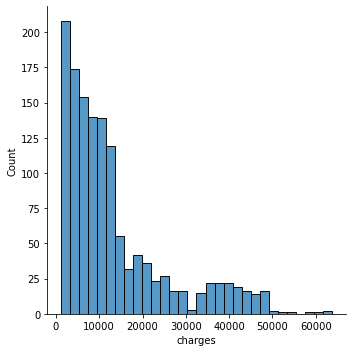

In [8]:
#DISTRIBUCIÓ DE LA VARIABLE OBJECTIU: EXPONENCIAL
sns.displot(dataset, x="charges")

In [9]:
#ARA MIREM ELS OUTLIERS AMB UN BOXPLOT de l'atribut objectiu


def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = dataset.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = dataset[x].skew()
    Q1 = dataset[x].quantile(0.25)
    Q3 = dataset[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((dataset[x] < (Q1 - 1.5 * IQR)) | (dataset[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {dataset[x].mean()}')
    print(f'Median {x.capitalize()} = {dataset[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')

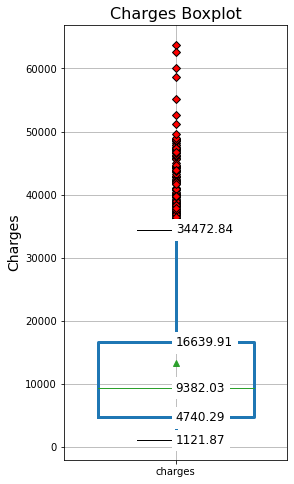

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [10]:
box_plot('charges')

In [11]:
#ANALITZEM UNA MICA ELS OUTLIERS PER ENTENDRE COM SÓN i mirar si poden ser un error d'escriptura o són acceptables
# Who is paying the highest charges?
dataset[dataset['charges'] == dataset['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


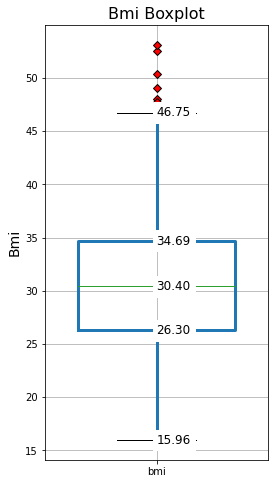

Mean Bmi = 30.663396860986538
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [12]:
#analitzem altres outliers, com per ex els del bmi
box_plot('bmi')
dataset[dataset['bmi'] == dataset['bmi'].max()]

In [33]:
#ARA MIREM LA DISTRIBUCIÓ D'ALGUNES VARIABLES
def distr(data, x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    Q4 = np.var(data[x])
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'Q4                    : {Q4}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.show()

5 Point Summary of Bmi Attribute:
Bmi(min) : 16.815
Q1                    : 26.125
Q2(Median)            : 30.1075
Q3                    : 34.31375
Q4                    : 36.49917703379856
Bmi(max) : 48.07


<ipython-input-33-c453db43dad6>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


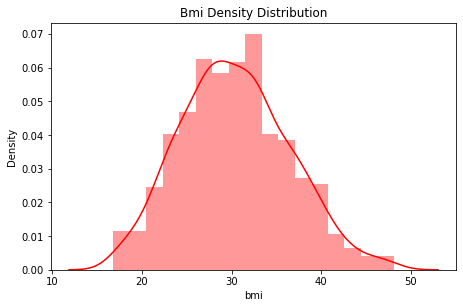

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.41
Q2(Median)            : 30.6875
Q3                    : 34.9925
Q4                    : 37.6491607363954
Bmi(max) : 53.13


<ipython-input-33-c453db43dad6>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


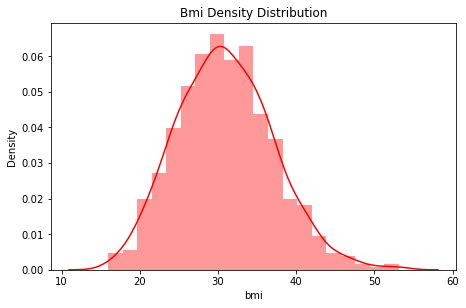

<ipython-input-33-c453db43dad6>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 40.0
Q3                    : 51.75
Q4                    : 197.22280054033826
Age(max) : 64


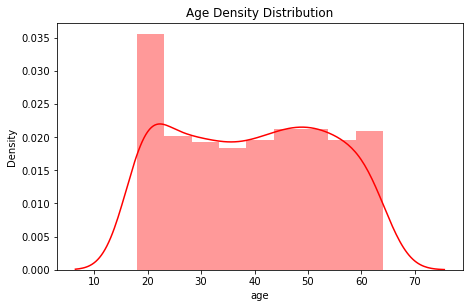

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 26.0
Q2(Median)            : 39.0
Q3                    : 51.0
Q4                    : 197.11443927033352
Age(max) : 64


<ipython-input-33-c453db43dad6>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


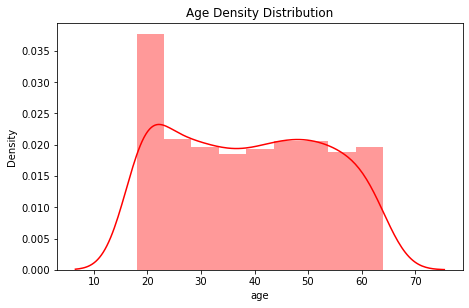

In [34]:
#MIREM LA DISTRIBUCIO DE LA VARIABLE bmi i de la edat
#posar titols als plots
distr(dataset[dataset["sex"] == '1'], 'bmi') #1 = dones
distr(dataset[dataset["sex"] == '0'], 'bmi') #0 = homes
distr(dataset[dataset["sex"] == '1'], 'age') #1 = dones
distr(dataset[dataset["sex"] == '0'], 'age') #0 = homes

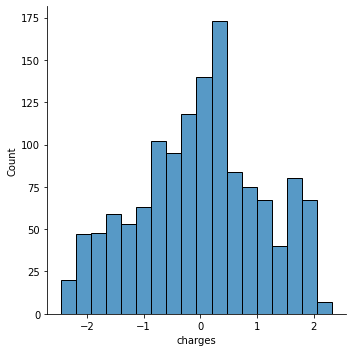

In [13]:
#NORMALITZEM LA COLUMNA DE DADES DE LA VARIABLE OBJECTIU MITJANÇANT LOGARITMES
dataset['charges_log'] = np.log(dataset['charges'])
dataset['charges'] =( dataset['charges_log'] - np.mean(dataset['charges_log'])) / np.var(dataset['charges_log'])
sns.displot(dataset, x = "charges")

In [14]:
#A partir d'aqui s'ha de mirar si les coses serveixen o no i organitzar

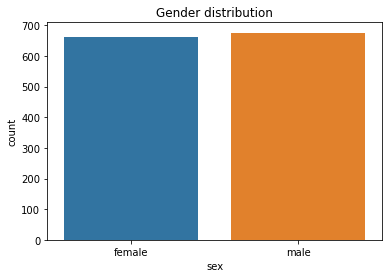

male      676
female    662
Name: sex, dtype: int64

In [16]:
# Gender column
ax = plt.axes()
ax.set(title='Gender distribution',
       xlabel='Gender',
       ylabel='Gender counts',
       )
sns.countplot(x='sex', data=dataset)
plt.show()
dataset['sex'].value_counts()

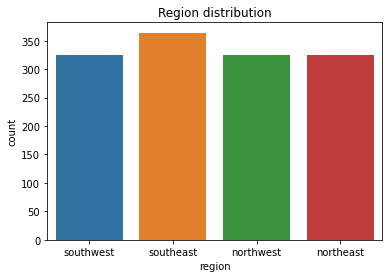

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
# Region column
ax = plt.axes()
ax.set(title='Region distribution',
       xlabel='Region',
       ylabel='Region counts',
       )
sns.countplot(x='region', data=dataset)
plt.show()
dataset['region'].value_counts()

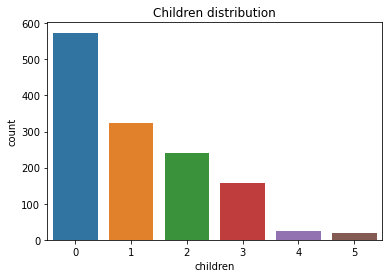

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [19]:
# Children column
ax = plt.axes()
ax.set(title='Children distribution',
       xlabel='Children',
       ylabel='Children counts',
       )
sns.countplot(x='children', data=dataset)
plt.show()
dataset['children'].value_counts()

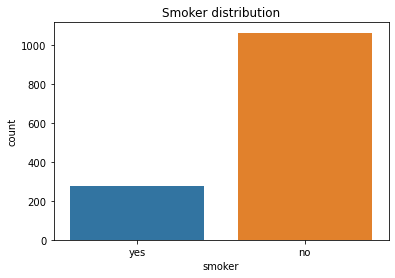

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
# Smoker column
ax = plt.axes()
ax.set(title='Smoker distribution',
       xlabel='Smoker',
       ylabel='Smoker counts',
       )
sns.countplot(x='smoker', data=dataset)
plt.show()

# Number of smoker 
dataset['smoker'].value_counts()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,1,27.900,0,1,1,0.752183,9.734176
1,18,0,33.770,1,0,2,-1.947402,7.453302
2,28,0,33.000,3,0,2,-0.826277,8.400538
3,33,0,22.705,0,0,3,1.064546,9.998092
4,32,0,28.880,0,0,3,-0.992382,8.260197
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,0.201210,9.268661
1334,18,1,31.920,0,0,4,-1.656686,7.698927
1335,18,1,36.850,0,0,2,-2.014948,7.396233
1336,21,1,25.800,0,0,1,-1.768014,7.604867


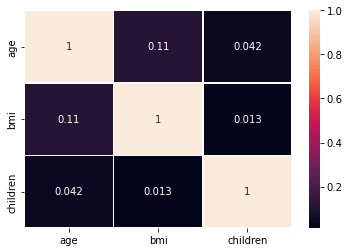

In [22]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = X.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [23]:
#APARTAT B